<a href="https://colab.research.google.com/github/Ifedaniel/Exploratory-Data-Analysis-of-Immigration-Trends/blob/main/Data_Analysis_of_UK_Immigration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of UK Immigration from year 1991 to 2022

The objective of this study is to use machine learning to forecast net migration value

In [ ]:
#importing the needed library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [ ]:
data = pd.read_excel("Immigration data.xlsx")

#previewing the data
data.head()

,Long-term international migration estimates in the UK (Thousands),Unnamed: 1,Unnamed: 2,Unnamed: 3,Immigration by main reason for migration,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,YEAR,Immigration,Emigration,Net migration,Work related,Accompany/Join,Formal Study,Other,None Stated,NaN,NaN
1,1991,329,285,44,71,90,56,67,45,NaN,NaN
2,1992,268,281,-13,76,75,42,45,30,NaN,NaN
3,1993,266,266,0,83,75,50,37,21,NaN,NaN
4,1994,315,238,77,113,78,51,50,23,NaN,NaN


### Data Cleaning and Preprocessing

In [ ]:
#Renaming the columns

data.columns = ['Year', 'Immigration', 'Emigration', 'Net Migration',
                'Work Related', 'Accompany/Join', 'Formal Study', 'Other', 'None Stated', 'Column 9', 'Column 10']

#previewing the column renaming
data.head(3)

,Year,Immigration,Emigration,Net Migration,Work Related,Accompany/Join,Formal Study,Other,None Stated,Column 9,Column 10
0,YEAR,Immigration,Emigration,Net migration,Work related,Accompany/Join,Formal Study,Other,None Stated,NaN,NaN
1,1991,329,285,44,71,90,56,67,45,NaN,NaN
2,1992,268,281,-13,76,75,42,45,30,NaN,NaN


In [ ]:
#dropping the redundant first row

data.drop(index=0, inplace=True)

#checking
data.head(3)

,Year,Immigration,Emigration,Net Migration,Work Related,Accompany/Join,Formal Study,Other,None Stated,Column 9,Column 10
1,1991,329,285,44,71,90,56,67,45,NaN,NaN
2,1992,268,281,-13,76,75,42,45,30,NaN,NaN
3,1993,266,266,0,83,75,50,37,21,NaN,NaN


In [ ]:
#checking the datatype

data.dtypes

Year               object
Immigration        object
Emigration         object
Net Migration      object
Work Related       object
Accompany/Join     object
Formal Study       object
Other              object
None Stated        object
Column 9          float64
Column 10          object
dtype: object

In [ ]:
#we need to convert the Year column to datetime type

data['Year']=pd.to_datetime(data['Year'],format='%Y')

In [ ]:
#confirming the data type

data.dtypes

Year              datetime64[ns]
Immigration               object
Emigration                object
Net Migration             object
Work Related              object
Accompany/Join            object
Formal Study              object
Other                     object
None Stated               object
Column 9                 float64
Column 10                 object
dtype: object

In [ ]:
#Dropping the irrelevent columns

data.drop(columns=['Column 9', 'Column 10'], inplace=True)

#confirming
data.head(3)

,Year,Immigration,Emigration,Net Migration,Work Related,Accompany/Join,Formal Study,Other,None Stated
1,1991-01-01,329,285,44,71,90,56,67,45
2,1992-01-01,268,281,-13,76,75,42,45,30
3,1993-01-01,266,266,0,83,75,50,37,21


In [ ]:
#checking the shape of our data
data.shape

(32, 9)

In [ ]:
#Converting the remaining column to int64

numeric_columns = data.columns.drop('Year')
data[numeric_columns] = data[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
data.dtypes

Year              datetime64[ns]
Immigration                int64
Emigration                 int64
Net Migration              int64
Work Related             float64
Accompany/Join           float64
Formal Study             float64
Other                    float64
None Stated              float64
dtype: object

In [ ]:
#checking the data for missing values

data.isnull().sum()

Year               0
Immigration        0
Emigration         0
Net Migration      0
Work Related      13
Accompany/Join    13
Formal Study      13
Other             13
None Stated       13
dtype: int64

In [ ]:
#imputing missing values uisng Linear Interpolation


data[['Work Related','Accompany/Join','Formal Study','Other','None Stated']]=data[['Work Related','Accompany/Join','Formal Study','Other','None Stated']].interpolate(method='linear')


In [ ]:
#rechecking missing values

data.isnull().sum()

Year              0
Immigration       0
Emigration        0
Net Migration     0
Work Related      0
Accompany/Join    0
Formal Study      0
Other             0
None Stated       0
dtype: int64

In [ ]:
#copying clean data

immigr_df = data.copy()


#previewing
immigr_df.head()

,Year,Immigration,Emigration,Net Migration,Work Related,Accompany/Join,Formal Study,Other,None Stated
1,1991-01-01,329,285,44,71.0,90.0,56.0,67.0,45.0
2,1992-01-01,268,281,-13,76.0,75.0,42.0,45.0,30.0
3,1993-01-01,266,266,0,83.0,75.0,50.0,37.0,21.0
4,1994-01-01,315,238,77,113.0,78.0,51.0,50.0,23.0
5,1995-01-01,312,236,76,58.0,63.0,63.0,109.0,19.0


## Exploratory Data Analysis (EDA)

#### Descriptive Statistics

In [ ]:
immigr_df.describe()

,Immigration,Emigration,Net Migration,Work Related,Accompany/Join,Formal Study,Other,None Stated
count,32.000000,32.000000,32.000000,32.00000,32.000000,32.000000,32.000000,32.00000
mean,1391.531250,858.406250,533.125000,267.65625,116.781250,253.250000,88.687500,50.21875
std,1193.174297,675.419146,561.276469,138.32258,42.266233,180.879928,25.849986,24.77347
min,266.000000,236.000000,-13.000000,58.00000,63.000000,42.000000,37.000000,16.00000
25%,438.250000,289.500000,146.000000,152.75000,77.750000,86.000000,65.750000,27.50000
50%,589.500000,380.500000,219.500000,238.50000,96.000000,152.500000,107.000000,43.50000
75%,2501.250000,1412.750000,1021.000000,413.00000,163.000000,452.000000,107.000000,77.00000
max,4484.000000,2176.000000,2414.000000,413.00000,163.000000,452.000000,125.000000,77.00000


From the analysis we found:
- Immigration: Averages at 1,391.53 (in thousands) with a standard deviation of 1,193.17, indicating significant variation over the years.
- Emigration: Averages at 858.41 (in thousands), also with considerable variation.
- Net Migration: Shows an average of 533.13 (in thousands) and a wide range of values (standard deviation of 561.28).
- Reasons for Migration: Among the reasons for migration, 'Work Related' migration has the highest average at 267.65, followed by 'Formal Study' (180.88), 'Other' (88.69), and 'None Stated' (50.22). Note the significant standard deviations in these categories, indicating wide yearly fluctuations.

#### Trend Analysis

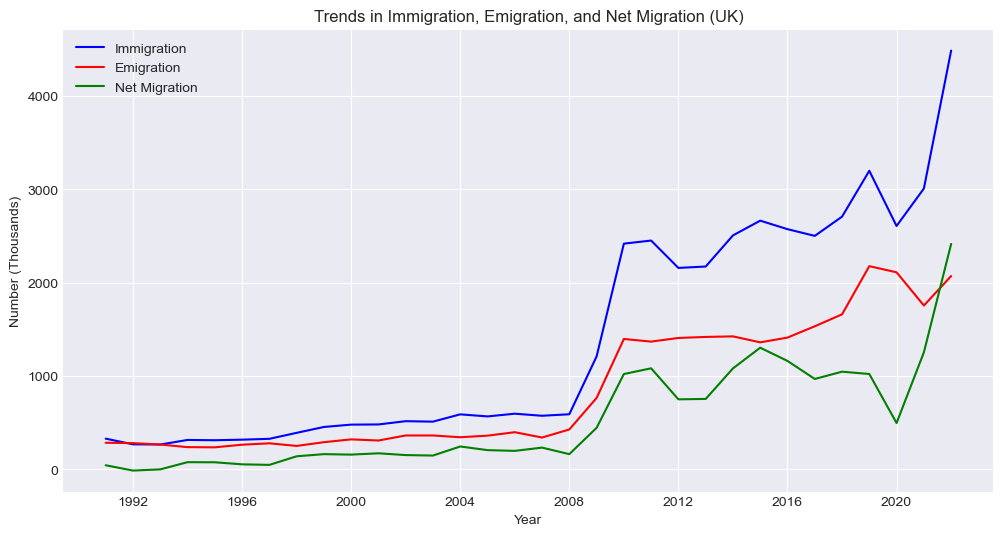

In [ ]:
plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots(figsize=(12, 6))

#plotting trends
ax.plot(immigr_df['Year'], immigr_df['Immigration'], label='Immigration', color='blue')
ax.plot(immigr_df['Year'], immigr_df['Emigration'], label='Emigration', color='red')
ax.plot(immigr_df['Year'], immigr_df['Net Migration'], label='Net Migration', color='green')

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number (Thousands)')
ax.set_title('Trends in Immigration, Emigration, and Net Migration (UK)')

# Adding a legend
ax.legend()

# Showing the plot
plt.show()

The trend analysis reveals the following observations:

- Immigration (Blue Line): Shows an overall increasing trend over the years, with some fluctuations.
- Emigration (Red Line): Also increases over time but with less steepness compared to immigration.
- Net Migration (Green Line): Generally follows the trend of immigration, indicating that the net migration is heavily influenced by the immigration rates.

#### Reasons for Immigration over the Years

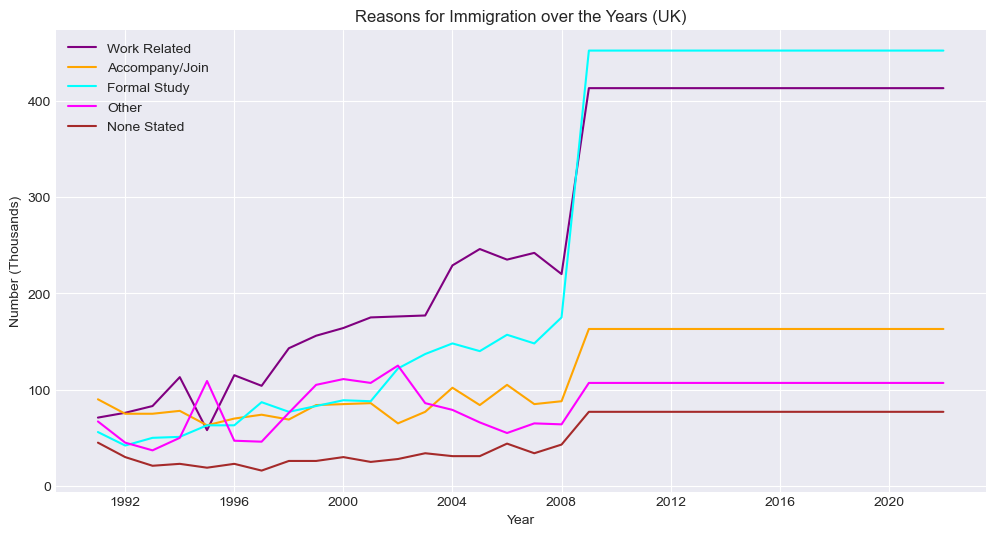

In [ ]:
# Creating a figure for reasons for migration
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the reasons for migration
ax.plot(immigr_df['Year'], immigr_df['Work Related'], label='Work Related', color='purple')
ax.plot(immigr_df['Year'], immigr_df['Accompany/Join'], label='Accompany/Join', color='orange')
ax.plot(immigr_df['Year'], immigr_df['Formal Study'], label='Formal Study', color='cyan')
ax.plot(immigr_df['Year'], immigr_df['Other'], label='Other', color='magenta')
ax.plot(immigr_df['Year'], immigr_df['None Stated'], label='None Stated', color='brown')

# Adding labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Number (Thousands)')
ax.set_title('Reasons for Immigration over the Years (UK)')

# Adding a legend
ax.legend()

# Showing the plot
plt.show()


The plot illustrating the reasons for immigration over the years in the UK shows:

- Work-Related (Purple Line): This category shows significant fluctuations and an overall increasing trend, indicating a strong correlation with economic factors and labor market needs.
- Accompany/Join (Orange Line): Relatively stable with slight increases over time, suggesting consistent patterns in family or relationship-based migration.
- Formal Study (Cyan Line): Exhibits variability, possibly reflecting changes in educational policies or the popularity of the UK as a study destination.
- Other Reasons (Magenta Line): Shows fluctuations and seems to have periods of increase and decrease, indicating varying other factors influencing immigration.
- None Stated (Brown Line): This category remains relatively low and stable, indicating a smaller proportion of migrants not stating a specific reason.

#### Comparative Analysis of Immigration and Emigration Trends

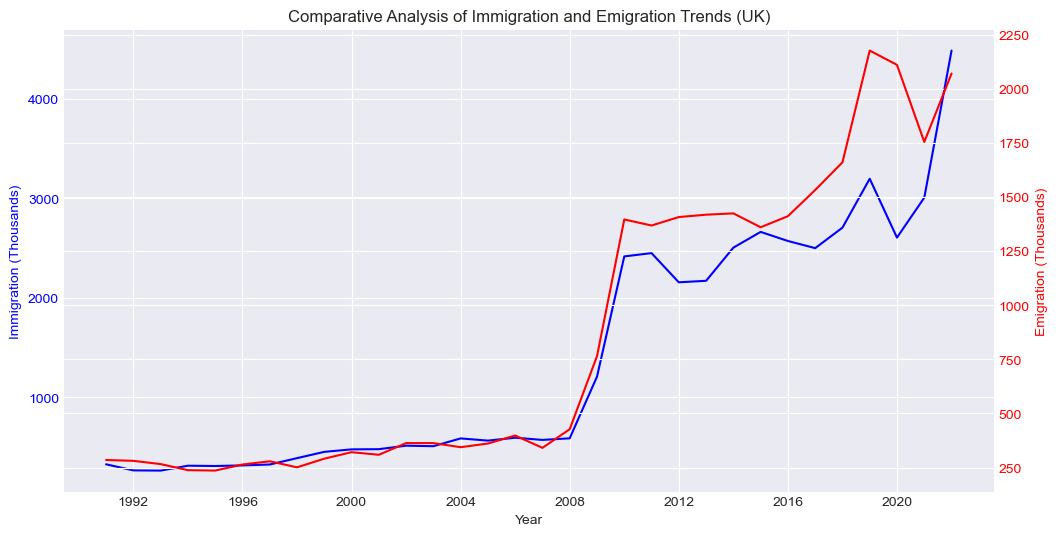

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Immigration
ax1.plot(immigr_df['Year'], immigr_df['Immigration'], label='Immigration', color='blue')
ax1.set_xlabel('Year')
ax1.set_ylabel('Immigration (Thousands)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Creating a second y-axis for Emigration
ax2 = ax1.twinx()
ax2.plot(immigr_df['Year'], immigr_df['Emigration'], label='Emigration', color='red')
ax2.set_ylabel('Emigration (Thousands)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding a title
plt.title('Comparative Analysis of Immigration and Emigration Trends (UK)')

# Showing the plot
plt.show()


- Immigration (Blue Line): This trend is overall higher and shows a more significant increase over time compared to emigration.
- Emigration (Red Line): Although it also increases, the rate is less steep than immigration, and the emigration numbers are consistently lower than immigration figures.
- This comparative view reinforces the trend observed in net migration, where the increase in net migration over the years is mainly due to the higher rate of increase in immigration compared to emigration.